In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d
#%load CaffeinevsSleep.ipynb

# Initial data table with no changes

In [162]:
sleep_data = pd.read_csv('Sleep_Efficiency.csv')
sleep_data

try1 = pd.read_csv('Sleep_Efficiency.csv')
try1

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


# Cleaning proccess
Some things seem to be missing so i will assume that Caffeine and Alcohol are meant to be 0. Awakening and Exercise frequency are being filled with the average.

In [163]:
sleep_data = sleep_data.drop(['ID'], axis=1) # Removing ID because it is not needed
sleep_data.isnull().sum() # Checking how many null values there are

Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [164]:
#sleep_data[['Caffeine consumption', 'Alcohol consumption']] = sleep_data[['Caffeine consumption', 'Alcohol consumption']].fillna(value=0)

#print('AwakeningMean: ' + str(AwakeningMean))
sleep_data['Awakenings'] = sleep_data['Awakenings'].fillna(value=sleep_data['Awakenings'].mean())
sleep_data['Exercise frequency'] = sleep_data['Exercise frequency'].fillna(value=sleep_data['Exercise frequency'].mean())
sleep_data['Caffeine consumption'] = sleep_data['Caffeine consumption'].fillna(value=round(sleep_data['Caffeine consumption'].mean()))
sleep_data['Alcohol consumption'] = sleep_data['Alcohol consumption'].fillna(value=round(sleep_data['Alcohol consumption'].mean()))


sleep_data.isnull().sum() # Checking how many null values there are

Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

# Exporation
BedTime and Wakeup Time have been expanded for better catagorization

In [165]:
sleep_data[['Bed date', 'Bedtime']] = sleep_data['Bedtime'].str.split(' ', 1, expand=True)
sleep_data[['Wakeup date', 'Wakeup time']] = sleep_data['Wakeup time'].str.split(' ', 1, expand=True)
#sleep_data.loc(sleep_data['Bedtime'] >= object'20:00:00', 'Time of day') = 2

sleep_data['Time of day'] = sleep_data['Bedtime'].map(lambda x: 'Early Morning' if x < '05:00:00' else 'Night')
#sleep_data['Time of day'] = sleep_data['Bedtime'].map(lambda x: 'Evening' if x <= '05:00:00' else 'Evening')
sleep_data['Time of day'].value_counts()

/tmp/ipykernel_10211/709296186.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sleep_data[['Bed date', 'Bedtime']] = sleep_data['Bedtime'].str.split(' ', 1, expand=True)
/tmp/ipykernel_10211/709296186.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  sleep_data[['Wakeup date', 'Wakeup time']] = sleep_data['Wakeup time'].str.split(' ', 1, expand=True)


Early Morning    241
Night            211
Name: Time of day, dtype: int64

<Axes: xlabel='Time of day', ylabel='Count'>

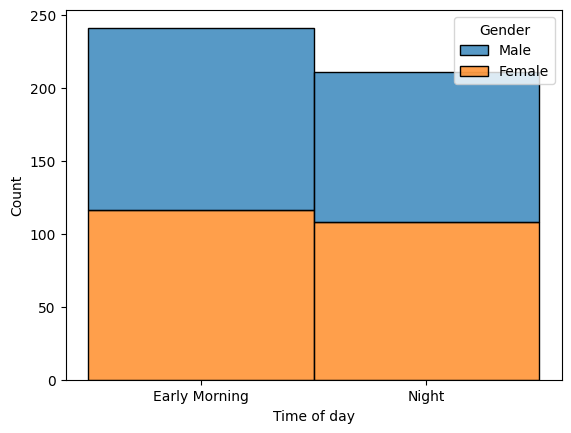

In [166]:
sleep_data = sleep_data.sort_values('Bedtime')
sns.histplot(sleep_data, x='Time of day', hue='Gender', multiple='stack')
#plt.xticks(rotation=45)
#plt.show()

<Axes: xlabel='Awakenings', ylabel='Age'>

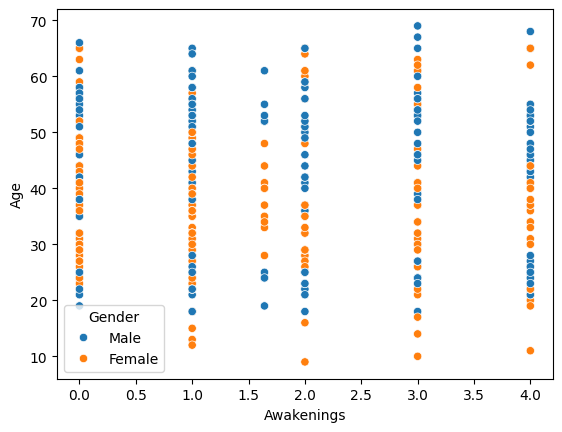

In [167]:
sleep_data.describe()
sns.scatterplot(data = sleep_data, y = 'Age', x = 'Awakenings', hue='Gender')

<Axes: xlabel='Caffeine consumption', ylabel='Age'>

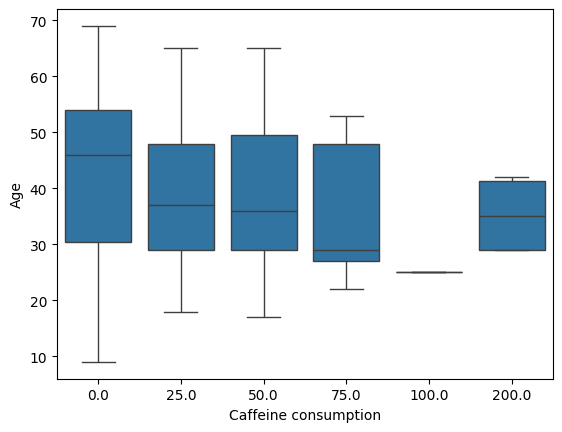

In [168]:
try1.describe()
sns.boxplot(data=try1, y= 'Age', x = 'Caffeine consumption')

In [169]:
X = sleep_data[['Awakenings']].values.reshape(-1, 1)
y = sleep_data[['Gender']].values.reshape(-1, 1)

# linModel = LinearRegression()
# linModel.fit(X, y)
# yPredicted = linModel.predict(X)
# plt.scatter(X, y, color='black')
# plt.plot(X, yPredicted, color='blue', linewidth=2)
# plt.xlabel('Awakening', fontsize=14)
# plt.ylabel('Age', fontsize=14)

In [170]:
# plt.scatter(X, y, color='black')
# plt.plot(X, yPredicted, color='blue', linewidth=2)
# for i in range(len(X)):
#     plt.plot([X[i], X[i]], [y[i], yPredicted[i]], color='grey', linewidth=1)
# plt.xlabel('Awakening', fontsize=14)
# plt.ylabel('Age', fontsize=14)

In [171]:
sleep_data.loc[sleep_data['Gender'] == 'Male', 'Gender'] = 0
sleep_data.loc[sleep_data['Gender'] == 'Female', 'Gender'] = 1
sleep_data = sleep_data.sort_values('Sleep duration')
sleep_data

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bed date,Wakeup date,Time of day
367,56,0,02:30:00,07:30:00,5.0,0.74,22,59,19,1.0,0.0,0.0,Yes,3.0,2021-08-03,2021-08-03,Early Morning
110,51,0,00:30:00,05:30:00,5.0,0.91,23,57,20,1.0,50.0,0.0,Yes,3.0,2021-06-18,2021-06-18,Early Morning
213,29,1,00:00:00,05:00:00,5.0,0.86,25,60,15,1.0,75.0,0.0,Yes,2.0,2021-10-29,2021-10-29,Early Morning
90,45,0,02:30:00,07:30:00,5.0,0.80,24,60,16,4.0,0.0,0.0,Yes,2.0,2021-03-29,2021-03-29,Early Morning
391,37,1,00:30:00,05:30:00,5.0,0.52,28,20,52,2.0,50.0,4.0,Yes,1.0,2021-08-24,2021-08-24,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,33,1,23:00:00,09:00:00,10.0,0.63,20,30,50,4.0,25.0,1.0,No,0.0,2021-09-26,2021-09-26,Night
303,51,0,02:30:00,12:30:00,10.0,0.78,24,59,17,2.0,0.0,0.0,Yes,2.0,2021-01-08,2021-01-08,Early Morning
42,29,1,00:00:00,10:00:00,10.0,0.59,28,20,52,2.0,50.0,0.0,Yes,1.0,2021-06-27,2021-06-27,Early Morning
363,30,1,01:30:00,11:30:00,10.0,0.92,22,65,13,0.0,25.0,1.0,No,0.0,2021-11-06,2021-11-06,Early Morning


Text(0, 0.5, 'Gender')

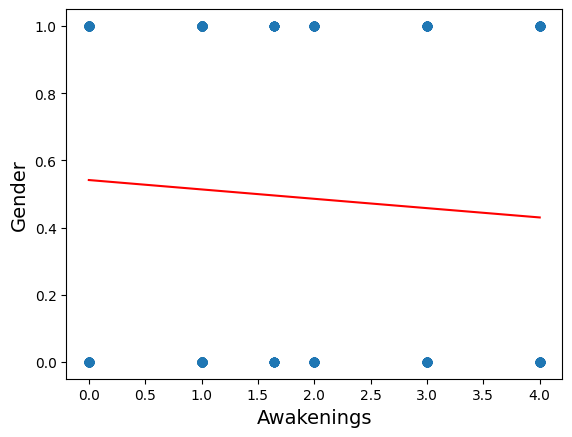

In [172]:
X = sleep_data[['Awakenings']].values.reshape(-1, 1)
y = sleep_data[['Gender']].values.reshape(-1, 1).astype(int)
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

# Graph logistic regression probabilities
plt.scatter(X, y)
xDelta = np.linspace(X.min(), X.max(), 10000)
yPredicted = logisticModel.predict(X).reshape(-1, 1).astype(int)
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1, 1))[:, 1]
plt.plot(xDelta, yDeltaProb, color='red')
plt.xlabel('Awakenings', fontsize=14)
plt.ylabel('Gender', fontsize=14)

In [173]:
# Display the slope parameter estimate
logisticModel.coef_

array([[-0.11193277]])

In [174]:
# Display the intercept parameter estimate
logisticModel.intercept_

array([0.16575058])